## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

In [4]:
print(df_train.info())
print(df_train[].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


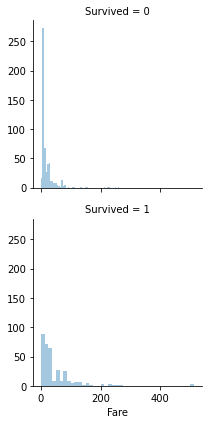

In [5]:
g = sns.FacetGrid(df_train, "Survived")
g.map(sns.distplot, 'Fare', kde=False)

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [6]:
df_train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

0元票價稍有不正常，不過仍先納入考量，待後續檢驗。

## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [7]:
def outliers_z_score(ys,times):
  mean = np.mean(ys)
  std = np.std(ys)
  z_scores = [(y - mean)/std for y in ys]

  return np.where(np.abs(z_scores) > times)

In [12]:
out_index = outliers_z_score(df_train["Fare"], 3)
df_train.loc[out_index, "Fare"]

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64

## 方法3-盒鬚圖判別法(IQR method)

In [49]:
def outliers_iqr(ys, times):
  quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
  iqr = quartile_3 - quartile_1
  lb = quartile_1 - (iqr * times)
  hb = quartile_3 + (iqr * times)

  return np.where((ys < lb) | (ys > hb))

In [50]:
out_index = outliers_iqr(df_train["Fare"], 1.5)
df_train.loc[out_index, "Fare"]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

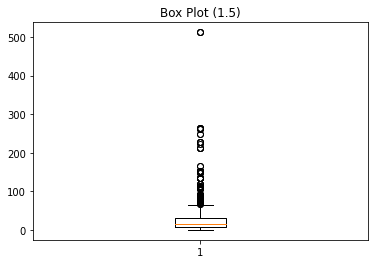

In [51]:
plt.boxplot(df_train["Fare"][~np.isnan(df_train["Fare"])], whis=1.5)
plt.title("Box Plot (1.5)")
plt.show()

In [52]:
out_index = outliers_iqr(df_train["Fare"], 8)
df_train.loc[out_index, "Fare"]

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
700    227.5250
716    227.5250
737    512.3292
742    262.3750
Name: Fare, dtype: float64

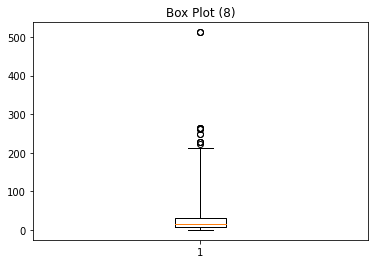

In [53]:
plt.boxplot(df_train["Fare"][~np.isnan(df_train["Fare"])], whis=8)
plt.title("Box Plot (8)")
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


可能不是真的異常，只是價格較高或較低的船票。